In [1]:
from ref_flow import main, write_pfd
import pyomo.environ as pyo
from IPython.display import display, Markdown, SVG, HTML
from idaes.core.util.expr_doc import document_constraints

In [2]:
m, solver = main()

Ipopt 3.13.2: tol=1e-06
halt_on_ampl_error=no
max_iter=50


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale

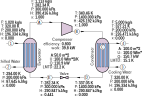

In [3]:
display(SVG(write_pfd(m.fs)))

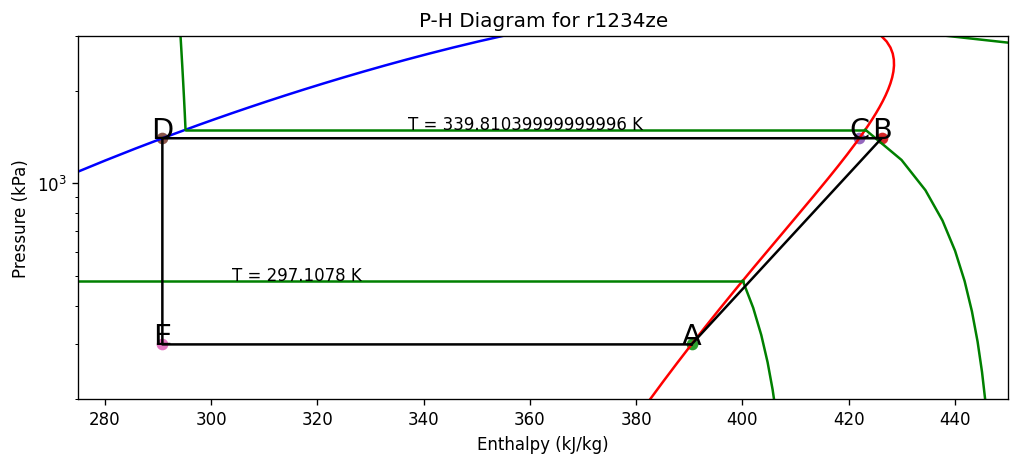

In [4]:
pA = m.fs.compressor.control_volume.properties_in[0]
pB = m.fs.compressor.control_volume.properties_out[0]
pD = m.fs.condenser.hot_side.properties_out[0]
pE = m.fs.valve.control_volume.properties_out[0]
pA2 = m.fs.evaporator.cold_side.properties_out[0]
pCW = m.fs.evaporator.hot_side.properties_out[0]

ph_plot = {
    "A": (pyo.value(pA.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pA.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    "B": (pyo.value(pB.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pB.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    "C": (pyo.value(pB.enth_mol_sat_phase["Vap"]*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pB.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    "D": (pyo.value(pD.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pD.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    "E": (pyo.value(pD.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pE.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
    #"A2": (pyo.value(pA2.enth_mol*m.fs.prop_ref.uc["J/mol to kJ/kg"]), pyo.value(pA2.pressure*m.fs.prop_ref.uc["Pa to kPa"])),
}

m.fs.prop_ref.ph_diagram(points=ph_plot, ylim=(200, 3000), xlim=(275, 450), dpi=120, figsize=(10,4)).show()

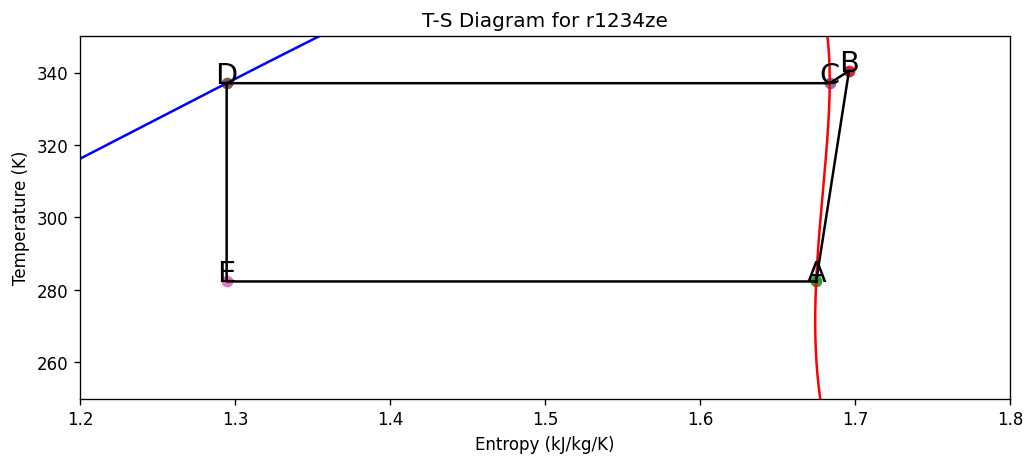

In [5]:
st_plot = {
    "A": (pyo.value(pA.entr_mol*m.fs.prop_ref.uc["J/mol/K to kJ/kg/K"]), pyo.value(pA.temperature)),
    "B": (pyo.value(pB.entr_mol*m.fs.prop_ref.uc["J/mol/K to kJ/kg/K"]), pyo.value(pB.temperature)),
    "C": (pyo.value(pB.entr_mol_sat_phase["Vap"]*m.fs.prop_ref.uc["J/mol/K to kJ/kg/K"]), pyo.value(pB.temperature_sat)),
    "D": (pyo.value(pD.entr_mol*m.fs.prop_ref.uc["J/mol/K to kJ/kg/K"]), pyo.value(pD.temperature)),
    "E": (pyo.value(pD.entr_mol*m.fs.prop_ref.uc["J/mol/K to kJ/kg/K"]), pyo.value(pE.temperature)),
}

m.fs.prop_ref.st_diagram(points=st_plot, ylim=(250, 350), xlim=(1.2, 1.8), dpi=120, figsize=(10,4)).show()

### Flowsheet Equations

In [6]:
display(HTML("<script src='https://www.gstatic.com/external_hosted/"
             "mathjax/latest/MathJax.js?config=default'></script>"))
display(Markdown(document_constraints(m.fs, descend_into=False, doc=False)))

    has changed to include the child index for the beforeChild() method.
    Please update your walker callbacks.  (deprecated in 5.7.0) (called from
    /Users/john/git/idaes-pse/idaes/core/util/expr_doc.py:163)


## fs.cond_eq
$$0.0 \le - \frac{h_{ {\textrm{sat}} ,Liq }}{1000} + 0.001 h_{\textrm{hot},1}\le 0.0$$
## fs.evap_eq
$$0.0 \le - \frac{h_{ {\textrm{sat}} ,Vap }}{1000} + 0.001 h_{\textrm{cold},1}\le 0.0$$

### Compressor Equations

In [7]:
display(HTML("<script src='https://www.gstatic.com/external_hosted/"
             "mathjax/latest/MathJax.js?config=default'></script>"))
display(Markdown(document_constraints(m.fs.compressor, descend_into=False, doc=False)))

## fs.compressor.eq_enth_out
$$0.0 \le - w + h_1 - h_0\le 0.0$$
## fs.compressor.eq_flow_out
$$0.0 \le F_1 - F_0\le 0.0$$

### Valve Equations

In [8]:
display(HTML("<script src='https://www.gstatic.com/external_hosted/"
             "mathjax/latest/MathJax.js?config=default'></script>"))
display(Markdown(document_constraints(m.fs.valve, descend_into=False, doc=False)))

## fs.valve.eq_enth_out
$$0.0 \le x_0 - x_1\le 0.0$$
## fs.valve.eq_flow_out
$$0.0 \le x_0 - x_1\le 0.0$$

### Condenser Equations

In [9]:
display(HTML("<script src='https://www.gstatic.com/external_hosted/"
             "mathjax/latest/MathJax.js?config=default'></script>"))
display(Markdown(document_constraints(m.fs.evaporator, descend_into=False, doc=False)))

## fs.evaporator.hot_energy_eq
$$0.0 \le \frac{Q}{F_{\textrm{hot},0}} + h_{\textrm{hot},1} - h_{\textrm{hot},0}\le 0.0$$
## fs.evaporator.cold_energy_eq
$$0.0 \le - \frac{Q}{F_{\textrm{cold},0}} + h_{\textrm{cold},1} - h_{\textrm{cold},0}\le 0.0$$
## fs.evaporator.hot_mass_eq
$$0.0 \le F_{\textrm{hot},1} - F_{\textrm{hot},0}\le 0.0$$
## fs.evaporator.cold_mass_eq
$$0.0 \le F_{\textrm{cold},1} - F_{\textrm{cold},0}\le 0.0$$
## fs.evaporator.hot_pressure_eq
$$0.0 \le P_{\textrm{hot},1} - P_{\textrm{hot},0}\le 0.0$$
## fs.evaporator.cold_pressure_eq
$$0.0 \le P_{\textrm{cold},1} - P_{\textrm{cold},0}\le 0.0$$

### Evaporator Equations

In [10]:
display(HTML("<script src='https://www.gstatic.com/external_hosted/"
             "mathjax/latest/MathJax.js?config=default'></script>"))
display(Markdown(document_constraints(m.fs.evaporator, descend_into=False, doc=False)))

## fs.evaporator.hot_energy_eq
$$0.0 \le \frac{Q}{F_{\textrm{hot},0}} + h_{\textrm{hot},1} - h_{\textrm{hot},0}\le 0.0$$
## fs.evaporator.cold_energy_eq
$$0.0 \le - \frac{Q}{F_{\textrm{cold},0}} + h_{\textrm{cold},1} - h_{\textrm{cold},0}\le 0.0$$
## fs.evaporator.hot_mass_eq
$$0.0 \le F_{\textrm{hot},1} - F_{\textrm{hot},0}\le 0.0$$
## fs.evaporator.cold_mass_eq
$$0.0 \le F_{\textrm{cold},1} - F_{\textrm{cold},0}\le 0.0$$
## fs.evaporator.hot_pressure_eq
$$0.0 \le P_{\textrm{hot},1} - P_{\textrm{hot},0}\le 0.0$$
## fs.evaporator.cold_pressure_eq
$$0.0 \le P_{\textrm{cold},1} - P_{\textrm{cold},0}\le 0.0$$